In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the 'Universalbank' dataset by using pandas library

bankdata = pd.read_csv(r"D:\iiit notes\Internship\15 seasion 31_may-2021\Universalbank.csv", header = 0)
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Display the dataset information 

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset) 

CreditCard_count = bankdata.CreditCard.value_counts() 
print('Class 0:', CreditCard_count[0]) 
print('Class 1:', CreditCard_count[1]) 
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1') 
print('Total CC Trans:', len(bankdata))

Class 0: 3530
Class 1: 1470
Proportion: 2.4 : 1
Total CC Trans: 5000


In [5]:
# Deleting the columns which are not influencing Target variable

bankdata1 = bankdata.drop(['ID','ZIP Code'],axis=1)

In [6]:
# Display the dataset information

bankdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [7]:
# Identify the Target and Independent variable

IndepVar = []

for col in bankdata1.columns:
    if col != 'CreditCard':
        IndepVar.append(col)
        
TargetVar = 'CreditCard'

x = bankdata1[IndepVar]
y = bankdata1[TargetVar]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 6)

In [9]:
# Split the data into train and test (Stratified sampling) 

from sklearn.model_selection import train_test_split 
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=42, 
                                                        stratify=bankdata[['Family', 'Education', 'Personal Loan', 
                                                                           'CD Account']])

# Logistic Regression Algorithm with random sampling 

In [12]:
# train the Logistic Regression Algorithm and build the model

from sklearn.linear_model import LogisticRegression
bankdataLR = LogisticRegression()
bankdataLR = bankdataLR.fit(x_train, y_train)

In [13]:
# Predict the model with test data set

y_pred = bankdataLR.predict(x_test)

In [14]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None)
print('Confusion matrix: \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# Classification report for precision, rrecall f1-Score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3)

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+fn+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp+fp+fn)), 3)

# Mathews Correlation coefficient (MCC). Range of values of MCC lie between -1 to +1
# A Model with a score of +1 is perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

from sklearn.metrics import roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix: 
 [[  85  349]
 [  18 1048]]
Outcome Values : 
 85 349 18 1048
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.20      0.32       434
           0       0.75      0.98      0.85      1066

    accuracy                           0.76      1500
   macro avg       0.79      0.59      0.58      1500
weighted avg       0.77      0.76      0.70      1500

Accuracy : 75.5 %
Precision : 82.5 %
Recall : 19.6 %
F1 Score : 0.317
Balanced Accuracy : 59.0 %
MCC 0.321
roc_auc_score: 0.589


Feature: 0, Score: -0.01597
Feature: 1, Score: 0.01523
Feature: 2, Score: -0.00153
Feature: 3, Score: 0.04713
Feature: 4, Score: -0.02741
Feature: 5, Score: -0.11271
Feature: 6, Score: -0.00093
Feature: 7, Score: -0.37837
Feature: 8, Score: -0.84930
Feature: 9, Score: 3.09492
Feature: 10, Score: -0.37462


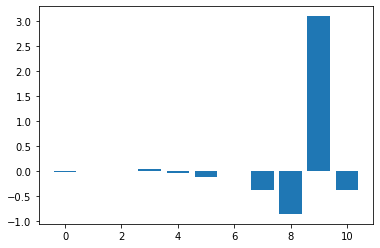

In [15]:
# To build the 'Logistic Regression' model with random sampling
# get importance
from matplotlib import pyplot
importance = bankdataLR.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# The positive scores indicate a feature that predicts class 1, 
# whereas the negative scores indicate a feature that predicts class 0.

# Logistic Regression Algorithm with Stratified sampling

In [16]:
# train the Logistic Regression Algorithm and build the model

from sklearn.linear_model import LogisticRegression
bankdataLR1 = LogisticRegression()
bankdataLR1 = bankdataLR1.fit(x1_train, y1_train)

In [17]:
# Predict the model with test data set

y_pred1 = bankdataLR1.predict(x1_test)

In [18]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred1

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None)
print('Confusion matrix: \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# Classification report for precision, rrecall f1-Score and accuracy

matrix = classification_report(actual, predicted, labels=[1,0])
print('Classification report : \n', matrix)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3)

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+fn+tn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp+fp+fn)), 3)

# Mathews Correlation coefficient (MCC). Range of values of MCC lie between -1 to +1
# A Model with a score of +1 is perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

# Area under ROC curve

from sklearn.metrics import roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred1), 3))

Confusion matrix: 
 [[  27  407]
 [  63 1003]]
Outcome Values : 
 27 407 63 1003
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.06      0.10       434
           0       0.71      0.94      0.81      1066

    accuracy                           0.69      1500
   macro avg       0.51      0.50      0.46      1500
weighted avg       0.59      0.69      0.61      1500

Accuracy : 68.7 %
Precision : 30.0 %
Recall : 6.2 %
F1 Score : 0.103
Balanced Accuracy : 50.1 %
MCC 0.006
roc_auc_score: 0.502


Feature: 0, Score: -0.02647
Feature: 1, Score: 0.03106
Feature: 2, Score: -0.00142
Feature: 3, Score: 0.05786
Feature: 4, Score: -0.01656
Feature: 5, Score: -0.07212
Feature: 6, Score: -0.00077
Feature: 7, Score: -0.32275
Feature: 8, Score: -0.74886
Feature: 9, Score: 2.79767
Feature: 10, Score: -0.33279


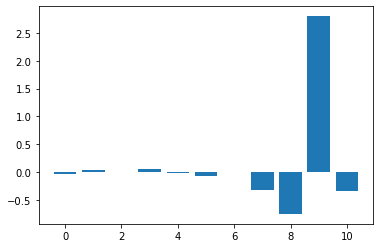

In [19]:
# To build the 'Logistic Regression' model with random sampling
# get importance
from matplotlib import pyplot
importance = bankdataLR1.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# The positive scores indicate a feature that predicts class 1, 
# whereas the negative scores indicate a feature that predicts class 0.